In [1]:
%matplotlib inline

In [2]:
import seaborn as sb

In [33]:
import pickle as pkl
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from scipy.stats import pearsonr

In [4]:
pred_error, inf_proba = pkl.load(open('data-files/prediction-error-and-infection-proba.pkl', 'rb'))

In [5]:
nodes = list(pred_error.keys())

In [6]:
pred_error_array = np.array([pred_error[n] for n in nodes])
inf_proba_array = np.array([inf_proba[n] for n in nodes])


In [67]:
ax.locator_params?

In [79]:
ax.scatter?

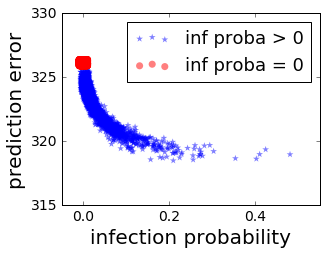

In [87]:
pos_indices = np.nonzero(inf_proba_array > 0)[0]
neg_indices = np.nonzero(inf_proba_array == 0)[0]
noise_x = np.random.uniform(-0.01, 0.01, size=inf_proba_array.shape)
noise_y = np.random.uniform(-0.25, 0.25, size=inf_proba_array.shape)

styles = {
    'edgecolors': 'none', 
    'alpha': 0.5,
    's': 50
}
fig, ax = plt.subplots(figsize=(5,4))

ax.scatter(inf_proba_array[pos_indices] + noise_x[pos_indices], 
            pred_error_array[pos_indices] + noise_y[pos_indices],
            c='b', marker='*',
           **styles)
ax.scatter(inf_proba_array[neg_indices] + noise_x[neg_indices],
            pred_error_array[neg_indices] + noise_y[neg_indices],
            c='r', marker='o',
           **styles)

ax.set_xlim(-0.05, 0.55)
# text
ax.legend(['inf proba > 0', 'inf proba = 0'], fontsize=18)
ax.set_xlabel('infection probability')
ax.set_ylabel('prediction error')

# font sizes
for item in ([ax.xaxis.label, ax.yaxis.label]):
    item.set_fontsize(20)
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(14)

# num. of ticks    
plt.locator_params(axis='y', nbins=3)
plt.locator_params(axis='x', nbins=5)    
ax.locator_params(nticks=4)

# misc
fig.tight_layout()

fig.savefig('figs/inf-proba-vs-pred-error.pdf')

In [ ]:
fig, ax = plt.subplots